C:\Users\HL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


模型准确率： 0.984


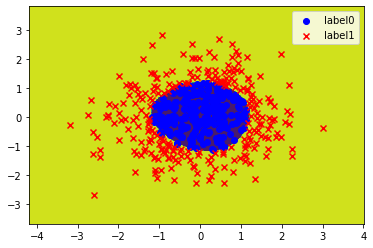

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm

##载入数据
data = np.genfromtxt("LR-testSet2.csv",delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

def plot():#画图
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    
    #图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')

#创建模型 并训练
model = svm.SVC()
model.fit(x_data,y_data)

#模型准确率
print("模型准确率：",model.score(x_data,y_data))

#获取数据所在的范围
x_min,x_max = x_data[:,0].min()-1,x_data[:,0].max()+1
y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()+1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

#画出等高线图
cs = plt.contourf(xx,yy,z)

#调用画图
plot()
plt.show()
